In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Baixar os dados do Kaggle (certifique-se de ter o kaggle.json configurado)
os.system("kaggle datasets download -d olistbr/brazilian-ecommerce -p ./ --unzip")


1

##  Hipoteses
___
* 1 Deve haver um número de ordem de pedidos proporcional ao número de clientes, sendo provavel que seja com um fator maior que 1
* 2 As menssagens de review, provavelmente conterão mais palavras negativas que positivas
* 3 A maioria das compras deve ser realizada no periodo noturno
___

In [7]:

folder = r"Olist_Data/"
# Carregar os datasets
orders = pd.read_csv(os.path.join(folder+"olist_orders_dataset.csv"))
order_items = pd.read_csv(os.path.join(folder+"olist_order_items_dataset.csv"))
customers = pd.read_csv(os.path.join(folder+"olist_customers_dataset.csv"))
sellers = pd.read_csv(os.path.join(folder+"olist_sellers_dataset.csv"))
products = pd.read_csv(os.path.join(folder+"olist_products_dataset.csv"))
payments = pd.read_csv(os.path.join(folder+"olist_order_payments_dataset.csv"))
reviews = pd.read_csv(os.path.join(folder+"olist_order_reviews_dataset.csv"))
geolocation = pd.read_csv(os.path.join(folder+"olist_geolocation_dataset.csv"))


In [8]:

# 1-8: Contagem de linhas nas tabelas
tabelas = {
    "orders": orders,
    "order_items": order_items,
    "customers": customers,
    "sellers": sellers,
    "products": products,
    "payments": payments,
    "reviews": reviews,
    "geolocation": geolocation
}

for nome, df in tabelas.items():
    print(f"{nome}: {df.shape[0]} linhas")


orders: 99441 linhas
order_items: 112650 linhas
customers: 99441 linhas
sellers: 3095 linhas
products: 32951 linhas
payments: 103886 linhas
reviews: 99224 linhas
geolocation: 1000163 linhas


In [20]:

# 9: Contar CEPs únicos
ceps_unicos = customers["customer_zip_code_prefix"].nunique()
print(f"Quantidade de CEPS únicos: {ceps_unicos}")


Quantidade de CEPS únicos: 14994


In [17]:

# 10: Quantidade de latitudes e longitudes
print(f"Quantidade de latitudes e longitudes únicas: {geolocation[['geolocation_lat', 'geolocation_lng']].nunique()}")


Quantidade de latitudes e longitudes únicas: geolocation_lat    717360
geolocation_lng    717613
dtype: int64


In [34]:

# 11: Agrupar latitudes e longitudes por CEP
geo_agg = geolocation.groupby("geolocation_zip_code_prefix")[["geolocation_lat", "geolocation_lng"]].mean()
print(geo_agg.head())

                             geolocation_lat  geolocation_lng
geolocation_zip_code_prefix                                  
1001                              -23.550190       -46.634024
1002                              -23.548146       -46.634979
1003                              -23.548994       -46.635731
1004                              -23.549799       -46.634757
1005                              -23.549456       -46.636733


In [ ]:

# 12: Agregar todas as tabelas disponíveis
merged_df = orders.merge(order_items, on="order_id", how="left") \
    .merge(customers, on="customer_id", how="left") \
    .merge(sellers, on="seller_id", how="left") \
    .merge(products, on="product_id", how="left") \
    .merge(payments, on="order_id", how="left") \
    .merge(reviews, on="order_id", how="left")

print(f"Tabela combinada possui {merged_df.shape[0]} linhas.")

Tabela combinada possui 119143 linhas.


In [24]:

# 13-15: Contagem de ordens, clientes e vendedores distintos
print(f"Ordens distintas: {orders['order_id'].nunique()}")
print(f"Clientes distintos: {customers['customer_id'].nunique()}")
print(f"Vendedores distintos: {sellers['seller_id'].nunique()}")

Ordens distintas: 99441
Clientes distintos: 99441
Vendedores distintos: 3095


In [25]:

# 16-17: Percentual de vendas por tipo de pagamento
payment_counts = payments["payment_type"].value_counts(normalize=True) * 100
print(payment_counts)

payment_type
credit_card    73.922376
boleto         19.043952
voucher         5.558978
debit_card      1.471806
not_defined     0.002888
Name: proportion, dtype: float64


In [26]:

# 18: Percentual de avaliações menores que 2 estrelas
low_reviews = (reviews["review_score"] < 2).mean() * 100
print(f"Porcentagem de reviews < 2 estrelas: {low_reviews:.2f}%")

Porcentagem de reviews < 2 estrelas: 11.51%


In [27]:

# 19: Número de categorias de produtos
print(f"Categorias de produto distintas: {products['product_category_name'].nunique()}")

Categorias de produto distintas: 73


In [28]:

# 20: Média de scores por categoria
category_scores = merged_df.groupby("product_category_name")["review_score"].mean()
print(category_scores.sort_values(ascending=False).head())

product_category_name
cds_dvds_musicais                4.642857
fashion_roupa_infanto_juvenil    4.500000
livros_interesse_geral           4.438503
flores                           4.419355
livros_importados                4.419355
Name: review_score, dtype: float64


In [29]:

# 21: Top 5 categorias com mais produtos
top_categories = products["product_category_name"].value_counts().head(5)
print(top_categories)

product_category_name
cama_mesa_banho          3029
esporte_lazer            2867
moveis_decoracao         2657
beleza_saude             2444
utilidades_domesticas    2335
Name: count, dtype: int64


In [30]:

# 22: Número total de comentários
print(f"Total de comentários: {reviews.shape[0]}")

Total de comentários: 99224


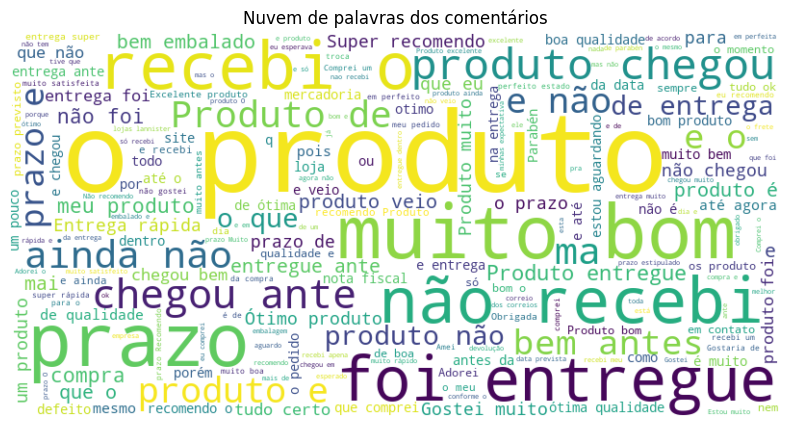

review_score
5    57.776344
4    19.291704
1    11.513344
3     8.242965
2     3.175643
Name: proportion, dtype: float64
Palavras mais comuns para a nota 0:
[]
Palavras mais comuns para a nota 1:
[('dia', 578), ('compra', 575), ('agora', 559)]
Palavras mais comuns para a nota 2:
[('porém', 119), ('2', 118), ('dia', 114)]
Palavras mais comuns para a nota 3:
[('bom', 266), ('porém', 218), ('bem', 187)]
Palavras mais comuns para a nota 4:
[('antes', 741), ('bom', 737), ('bem', 446)]
Palavras mais comuns para a nota 5:
[('antes', 4473), ('bem', 2115), ('bom', 2054)]


In [62]:
from collections import Counter
# 23: Nuvem de palavras dos comentários
text = " ".join(reviews["review_comment_message"].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nuvem de palavras dos comentários")
plt.show()

print(reviews["review_score"].value_counts(normalize=True) * 100)

stopwords = set([
    "até", "recebi", "produto", "veio", "é", "e", "o", "a", "de", "que", "do", "da", "em", "um", "uma", 
    "para", "com", "não", "na", "no", "os", "as", "mais", "menos", "por", "foi", "se", "nao", "já", 
    "ou", "mas", "essa", "essa", "ter", "isso", "como", "ao", "quando", "aqui", "aquela", "muito", 
    "muita", "não", "nem", "até", "chegou", "entregue", "entrega", "meu", "me", "prazo", "comprei", 
    "comprei", "fui", "minha", "tava", "fui", "chegar", "esperava", "mesmo", "muito", "tamanho", "eu", "só", "ainda", "estou"
])
# Função para obter as palavras mais comuns, excluindo stopwords
def most_common_words(text_series, n=3):
    all_words = " ".join(text_series.dropna()).lower().split()  # Converte tudo para minúsculas
    filtered_words = [word for word in all_words if word not in stopwords]  # Excluir stopwords
    word_counts = Counter(filtered_words)
    return word_counts.most_common(n)

# Obter as 3 palavras mais comuns para cada valor de review_score
for score in range(6):  # Para notas de 0 a 5
    print(f"Palavras mais comuns para a nota {score}:")
    common_words = most_common_words(reviews[reviews["review_score"] == score]["review_comment_message"], 3)
    print(common_words)

In [49]:

# 24: Porcentagem de ordens entregues
entregues = (orders["order_status"] == "delivered").mean() * 100
print(f"Porcentagem de ordens entregues: {entregues:.2f}%")

Porcentagem de ordens entregues: 97.02%


In [13]:

# 25-27: Tempos médios de aprovação e entrega
orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"])
orders["order_approved_at"] = pd.to_datetime(orders["order_approved_at"])
orders["order_delivered_customer_date"] = pd.to_datetime(orders["order_delivered_customer_date"])
orders["order_estimated_delivery_date"] = pd.to_datetime(orders["order_estimated_delivery_date"])

tempo_aprovacao = (orders["order_approved_at"] - orders["order_purchase_timestamp"]).dt.total_seconds().mean() / 3600
tempo_entrega = (orders["order_delivered_customer_date"] - orders["order_purchase_timestamp"]).dt.days.mean()
diferenca_entrega = (orders["order_estimated_delivery_date"] - orders["order_delivered_customer_date"]).dt.days.mean()

print(f"Tempo médio de aprovação: {tempo_aprovacao:.2f} horas")
print(f"Tempo médio de entrega: {tempo_entrega:.2f} dias")
print(f"Tempo médio de atraso/adiantamento: {diferenca_entrega:.2f} dias")


Tempo médio de aprovação: 10.42 horas
Tempo médio de entrega: 12.09 dias
Tempo médio de atraso/adiantamento: 10.88 dias


In [67]:

# 28: Período do dia mais comum de compras por estado
orders["hora_compra"] = orders["order_purchase_timestamp"].dt.hour
orders["periodo"] = pd.cut(orders["hora_compra"], bins=[0, 12, 18, 24], labels=["Manhã", "Tarde", "Noite"], right=False)
estado_periodo = orders.merge(customers, on="customer_id")[["customer_state", "periodo"]].value_counts().unstack()
print(estado_periodo)

periodo         Manhã  Tarde  Noite
customer_state                     
AC                 18     35     28
AL                109    161    143
AM                 30     68     50
AP                 22     23     23
BA                916   1246   1218
CE                389    503    444
DF                564    847    729
ES                583    754    696
GO                578    784    658
MA                209    296    242
MG               3182   4422   4031
MS                186    311    218
MT                244    383    280
PA                267    383    325
PB                160    198    178
PE                473    579    600
PI                155    186    154
PR               1369   1938   1738
RJ               3503   4912   4437
RN                135    182    168
RO                 70    101     82
RR                  8     22     16
RS               1375   2069   2022
SC                922   1402   1313
SE                112    104    134
SP              11321  16327

In [68]:
print("Compras totais por horario:")

compras_por_periodo = orders["periodo"].value_counts()
print(compras_por_periodo)

Compras totais por horario:
periodo
Tarde    38361
Noite    34100
Manhã    26980
Name: count, dtype: int64


In [64]:

# 29: Tipos de dados da tabela combinada
print(merged_df.dtypes)

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date             object
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
hora_compra                               int32
periodo                                category
order_item_id                           float64
product_id                               object
seller_id                                object
shipping_limit_date                      object
price                                   float64
freight_value                           float64
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
seller_zip_code_prefix                  

In [37]:

# 30-31: Clientes e vendedores por estado
clientes_por_estado = customers["customer_state"].value_counts()
vendedores_por_estado = sellers["seller_state"].value_counts()
print(clientes_por_estado)
print(vendedores_por_estado)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64
seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
RN       5
MS       5
MT       4
RO       2
SE       2
PI       1
AC       1
MA       1
AM       1
PA       1
Name: count, dtype: int64


In [38]:

# 32: Clientes na região metropolitana de SP
clientes_sp = customers[customers["customer_state"] == "SP"]
print(f"Clientes em SP: {clientes_sp.shape[0]}")

Clientes em SP: 41746


In [39]:

# 33-34: Avaliação média dos vendedores e valor médio do frete por estado
avaliacao_vendedores = merged_df.groupby("customer_state")["review_score"].mean()
frete_por_estado = merged_df.groupby("customer_state")["freight_value"].mean()
print(avaliacao_vendedores)
print(frete_por_estado)

customer_state
AC    4.094737
AL    3.715835
AM    4.070175
AP    4.240964
BA    3.807235
CE    3.810167
DF    3.987981
ES    3.974656
GO    3.975710
MA    3.670588
MG    4.068543
MS    4.054651
MT    3.890277
PA    3.786101
PB    3.992101
PE    3.957469
PI    3.849123
PR    4.087130
RJ    3.799830
RN    4.049296
RO    3.979381
RR    3.576923
RS    4.027184
SC    3.988861
SE    3.795511
SP    4.108609
TO    4.138643
Name: review_score, dtype: float64
customer_state
AC    40.021684
AL    35.643680
AM    33.045233
AP    34.084405
BA    26.297048
CE    32.457879
DF    21.051144
ES    21.976708
GO    22.747387
MA    38.200931
MG    20.609697
MS    23.350993
MT    28.953218
PA    35.649377
PB    43.228984
PE    32.717201
PI    39.201847
PR    20.585367
RJ    21.094054
RN    35.270490
RO    40.970175
RR    42.984423
RS    21.806349
SC    21.444302
SE    36.627935
SP    15.191519
TO    39.677286
Name: freight_value, dtype: float64


c:\Users\helio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\helio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


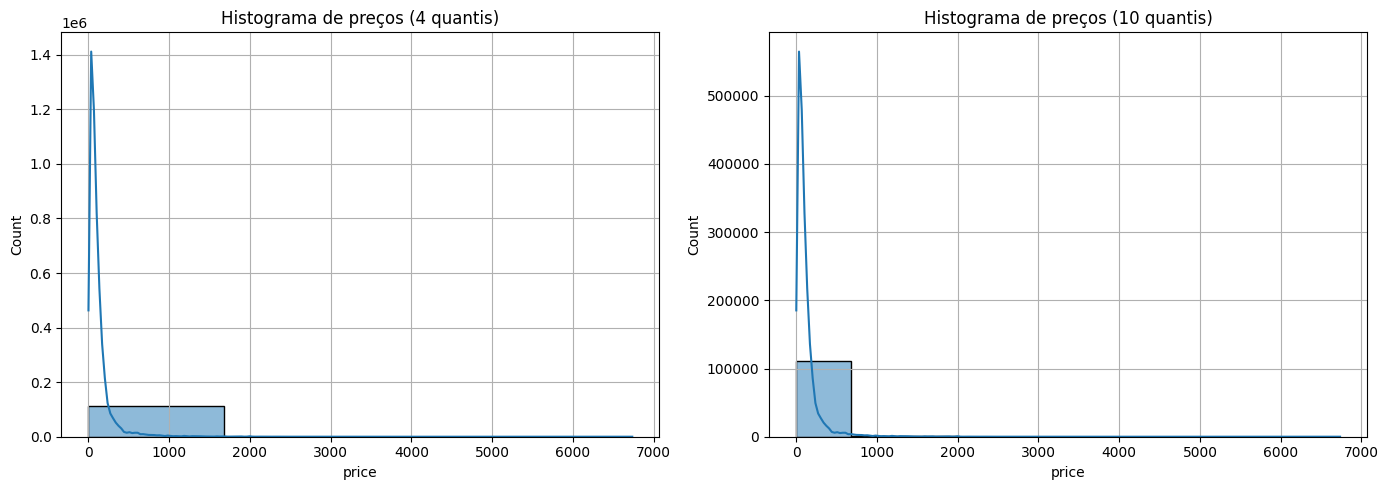

In [42]:

# 35-36: Histogramas de preços
# Criar a figura e os subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1 linha, 2 colunas

# Primeiro histograma (4 quantis)
sns.histplot(order_items["price"], bins=4, kde=True, ax=axes[0])
axes[0].set_title("Histograma de preços (4 quantis)")
axes[0].grid(True)

# Segundo histograma (10 quantis)
sns.histplot(order_items["price"], bins=10, kde=True, ax=axes[1])
axes[1].set_title("Histograma de preços (10 quantis)")
axes[1].grid(True)

# Ajustar layout
plt.tight_layout()
plt.show()

In [43]:

# 37-39: Análise do primeiro quartil em SP
q1 = order_items["price"].quantile(0.25)
clientes_q1_sp = customers[(customers["customer_state"] == "SP") & (order_items["price"] <= q1)]
print(f"Clientes em SP no 1º quartil: {clientes_q1_sp.shape[0]}")

Clientes em SP no 1º quartil: 10560


C:\Users\helio\AppData\Local\Temp\ipykernel_40604\2329799374.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clientes_q1_sp = customers[(customers["customer_state"] == "SP") & (order_items["price"] <= q1)]


In [44]:

# 40: TAM estimado
tam_sp_q1 = (clientes_q1_sp.shape[0] / customers.shape[0]) * 6_000_000
print(f"Tamanho estimado do mercado no 1º quartil em SP: {tam_sp_q1:.0f} clientes")

Tamanho estimado do mercado no 1º quartil em SP: 637162 clientes


Hipoteses pré analise
___
* 1 Deve haver um número de ordem de pedidos proporcional ao número de clientes, sendo provavel que seja com um fator maior que 1
* 2 As menssagens de review, provavelmente conterão mais reviews positivas do que negativas
* 3 A maioria das compras deve ser realizada no periodo noturno
___

Hipoteses pós analise

___
* 1 Estranhamente o número de pedidos é exatamente igual ao de clientes, sugeringo que só houve um pedido por cliente, o que é estranho
* 2 As palavras mas comuns foram sobre o produto, sem indicar muito a satisfação do cliente, porém pode-se notar que a palvra bom e bem repetida na avaliação positiva, enquanto as negativas não apresentam correlação clara
* 3 Após checar a base podemos concluir que na realidade a maioria das compras é realizada no periodo da tarde
___

Conclusão:

___
* 1 Refutada
* 2 Atualizada
* 3 Refutada
___